# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan merupakan dataset [Sleep Cycle & Productivity]("https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity"). Dataset ini melacak kebiasaan tidur yang mencakup 5000 catatan yang melibatkan berbagai individu dari berbagai usia dan gaya hidup.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [30]:
#Type your code here
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrinandasari","key":"5055210fa50577676902bd34e9cb05c1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d adilshamim8/sleep-cycle-and-productivity
!unzip sleep-cycle-and-productivity.zip

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity
License(s): other
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 346MB/s]
Archive:  sleep-cycle-and-productivity.zip
  inflating: sleep_cycle_productivity.csv  


In [24]:
df = pd.read_csv('sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


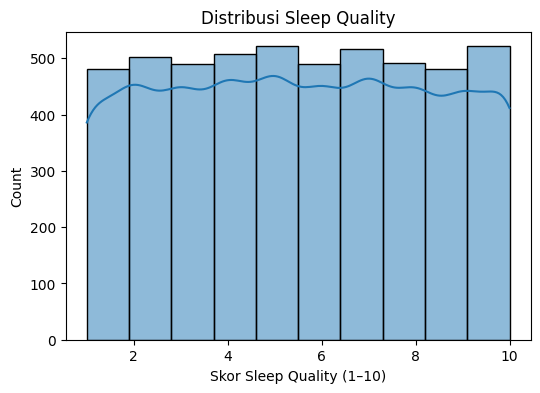

In [8]:
# Distribusi sleep quality
plt.figure(figsize=(6, 4))
sns.histplot(df['Sleep Quality'], kde=True, bins=10)
plt.title("Distribusi Sleep Quality")
plt.xlabel("Skor Sleep Quality (1–10)")
plt.show()

**Insight:**  
Distribusi sleep quality terlihat cukup merata dari skor 1 hingga 10, tanpa dominasi signifikan pada nilai tertentu. Hal ini menunjukkan data target seimbang dan ideal untuk digunakan dalam model regresi.

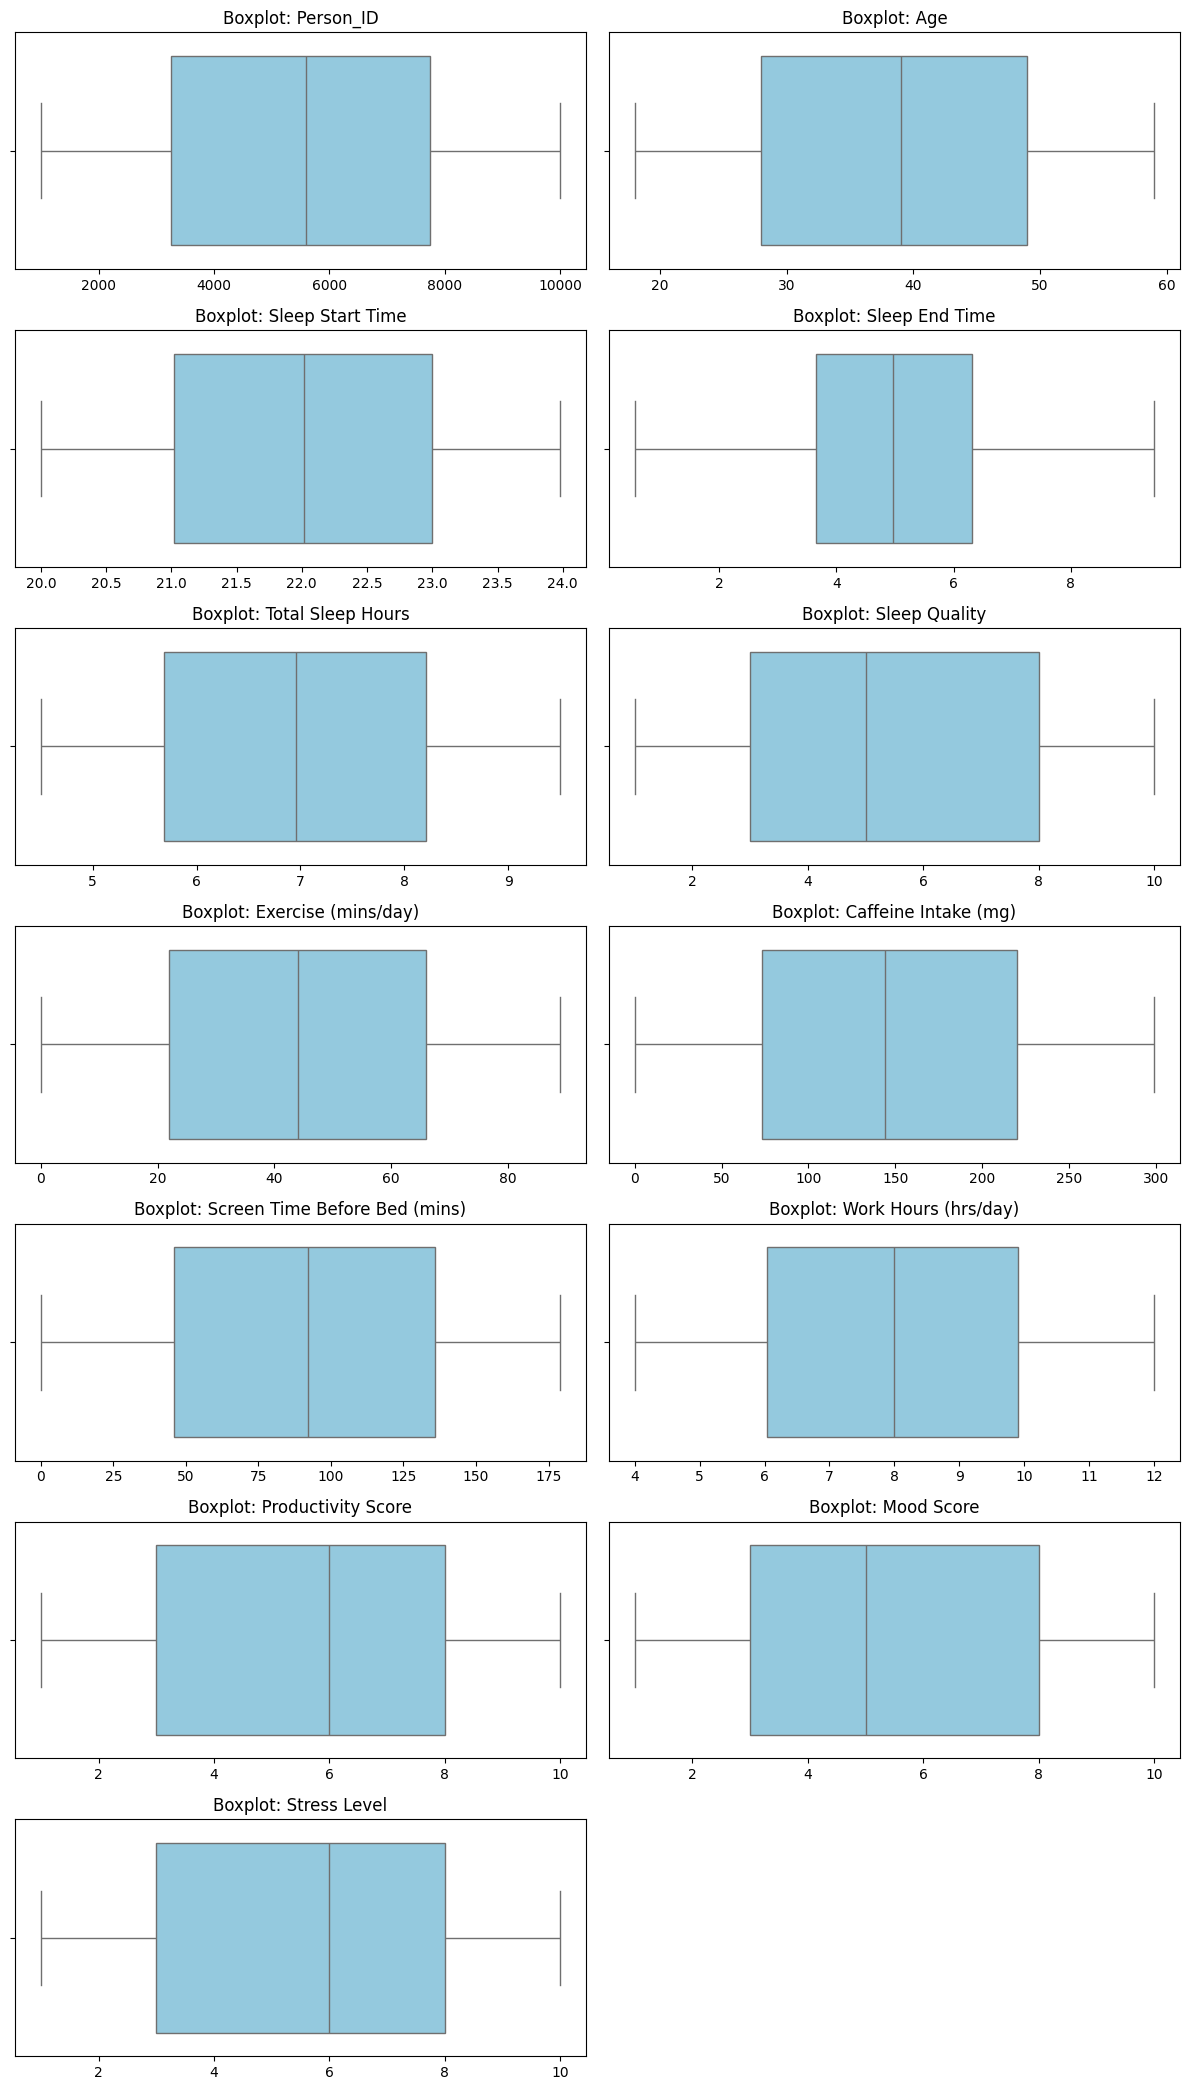

In [9]:
# Visualisasi Boxplot fitur numerik

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 2
n_rows = (len(numeric_features) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color='skyblue',
        showfliers=True,
        fliersize=5
    )
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Insight:**  
Berdasarkan visualisasi boxplot terhadap seluruh fitur numerik, tidak ditemukan outlier signifikan pada data. Semua nilai berada dalam rentang yang wajar dan masih tercakup dalam whisker boxplot. Dengan demikian, data dianggap bersih dan dapat langsung digunakan dalam proses pelatihan model tanpa perlakuan tambahan terhadap pencilan.

<ipython-input-10-81209068>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


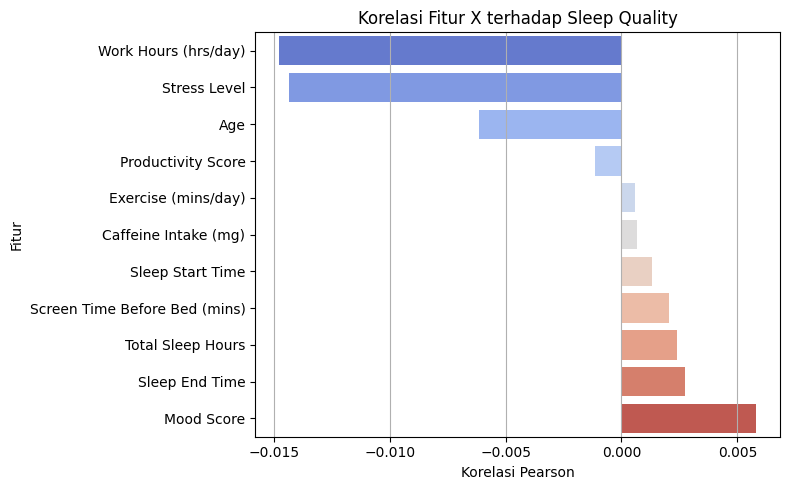

In [10]:
# Korelasi fitur X terhadap fitur target

# Daftar fitur X dan target
features = [
    'Age',
    'Sleep Start Time',
    'Sleep End Time',
    'Total Sleep Hours',
    'Exercise (mins/day)',
    'Caffeine Intake (mg)',
    'Screen Time Before Bed (mins)',
    'Work Hours (hrs/day)',
    'Stress Level',
    'Mood Score',
    'Productivity Score'
]

target = 'Sleep Quality'

# Hitung korelasi fitur X terhadap Y
correlations = df[features + [target]].corr()[target].drop(target).sort_values()

# Visualisasi korelasi fitur terhadap target
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Korelasi Fitur X terhadap Sleep Quality")
plt.xlabel("Korelasi Pearson")
plt.ylabel("Fitur")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

**Insight:**  
Berdasarkan analisis korelasi, `fitur Work Hours`, `Stress Level`, dan `Mood Score` menunjukkan hubungan yang lebih nyata terhadap `Sleep Quality`, meskipun tetap lemah secara linier. Beberapa fitur seperti `Caffeine Intake` dan `Exercise Duration` dihapus karena kontribusinya mendekati nol, sehingga tidak relevan untuk model prediksi berbasis hubungan linier.

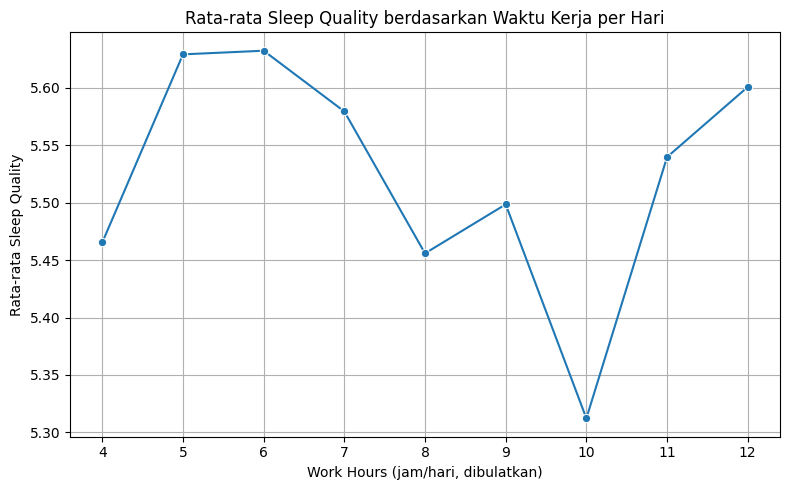

In [11]:
# Line plot hubungan waktu kerja dan kualitas tidur

df['Work Hours (hrs/day)'] = df['Work Hours (hrs/day)'].round()

# Hitung rata-rata sleep quality per jam kerja
mean_sleep = df.groupby('Work Hours (hrs/day)')['Sleep Quality'].mean().reset_index()

# Plot lineplot rata-rata
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='Work Hours (hrs/day)',
    y='Sleep Quality',
    data=mean_sleep,
    marker='o'
)
plt.title("Rata-rata Sleep Quality berdasarkan Waktu Kerja per Hari")
plt.xlabel("Work Hours (jam/hari, dibulatkan)")
plt.ylabel("Rata-rata Sleep Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**  
Kualitas tidur terbaik rata-rata terjadi pada pekerja dengan waktu kerja 5–6 jam per hari. Jam kerja yang terlalu panjang (≥10 jam) cenderung berkorelasi negatif terhadap kualitas tidur, dengan titik terendah terjadi saat bekerja 10 jam per hari. Menariknya, setelah titik terendah tersebut, terdapat kenaikan kembali pada jam kerja 11–12 jam, meskipun tidak mencapai puncak seperti di 5–6 jam. Mengingat tidak ada outlier signifikan pada fitur Work Hours, maka kenaikan rata-rata Sleep Quality pada jam kerja ekstrem (11–12 jam) kemungkinan bukan disebabkan oleh anomali data, melainkan memang merupakan bagian dari tren alami dalam kelompok tersebut. Hal ini memperkuat dugaan bahwa beberapa individu dengan jam kerja tinggi mungkin memiliki pola tidur yang lebih teratur atau disiplin.

<ipython-input-12-876568994>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Mood Score', y='Sleep Quality', data=df, ci=None, marker='o')


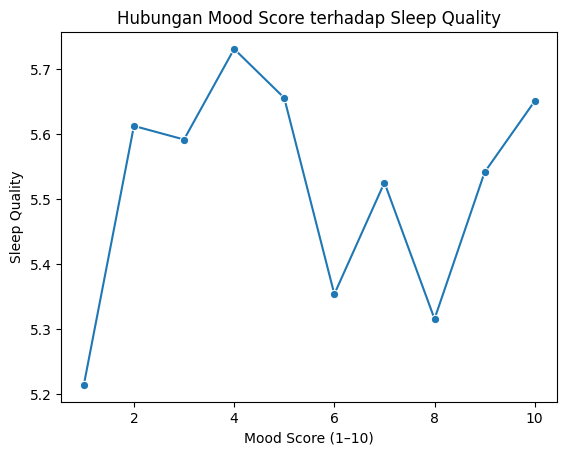

In [12]:
# Lineplot rerata Sleep Quality berdasarkan Mood Score
sns.lineplot(x='Mood Score', y='Sleep Quality', data=df, ci=None, marker='o')
plt.title("Hubungan Mood Score terhadap Sleep Quality")
plt.xlabel("Mood Score (1–10)")
plt.ylabel("Sleep Quality")
plt.show()

**Insight:**  
Berdasarkan grafik hubungan antara Mood Score dan Sleep Quality, terlihat bahwa kualitas tidur cenderung meningkat saat suasana hati membaik, terutama pada rentang skor mood 1 hingga 4. Namun, tren ini tidak sepenuhnya linier; terdapat fluktuasi di rentang skor menengah (5–8), yang mungkin disebabkan oleh faktor eksternal lain seperti stres atau kelelahan.

<ipython-input-13-1449891499>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Stress Level', y='Sleep Quality', data=df, ci=None, marker='o')


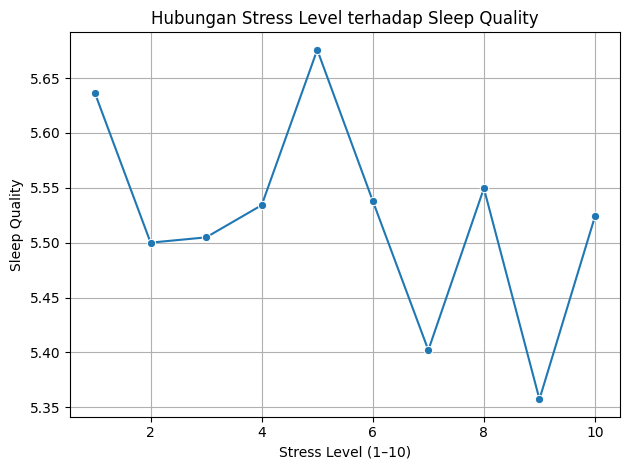

In [13]:
#Hubungan stress level terhadap sleep quality
sns.lineplot(x='Stress Level', y='Sleep Quality', data=df, ci=None, marker='o')

plt.title("Hubungan Stress Level terhadap Sleep Quality")
plt.xlabel("Stress Level (1–10)")
plt.ylabel("Sleep Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**  
Berdasarkan grafik hubungan antara **Stress Level** dan **Sleep Quality**, terlihat bahwa **tidak terdapat pola linier yang konsisten** antara tingkat stres dan kualitas tidur. Meskipun secara umum **kualitas tidur cenderung menurun pada tingkat stres yang lebih tinggi**, terdapat fluktuasi di beberapa titik—misalnya, *Sleep Quality* justru sedikit meningkat pada stres level 5 dan 8. Hal ini menunjukkan bahwa meskipun stres memengaruhi kualitas tidur, dampaknya **mungkin dipengaruhi oleh faktor lain** seperti kebiasaan tidur, mood, atau aktivitas harian. Kesimpulannya, **stres bukan satu-satunya penentu utama**, tapi tetap merupakan indikator penting dalam prediksi kualitas tidur.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [25]:
# 1. Hapus kolom yang tidak diperlukan langsung dari df
df.drop(columns=[
    'Date',
    'Person_ID',
    'Gender',
    'Productivity Score',
    'Exercise (mins/day)',
    'Caffeine Intake (mg)'
], inplace=True)

In [26]:
# Binning fitur Mood Score
df['Mood Score'] = pd.cut(
    df['Mood Score'],
    bins=[0, 4, 7, 10],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Binning fitur Stress Level
df['Stress Level'] = pd.cut(
    df['Stress Level'],
    bins=[0, 4, 7, 10],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Binning fitur Screen Time
df['Screen Time Before Bed (mins)'] = pd.cut(
    df['Screen Time Before Bed (mins)'],
    bins=[0, 30, 60, 180],
    labels=['<30 menit', '30–60 menit', '>60 menit'],
    include_lowest=True
)

# Binning target Sleep Quality
df['Sleep Quality'] = pd.cut(
    df['Sleep Quality'],
    bins=[0, 4, 7, 10],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

In [33]:
#label encoder
categorical_cols = ['Mood Score', 'Stress Level', 'Screen Time Before Bed (mins)', 'Sleep Quality']

# Buat dan simpan encoder per kolom
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # df = dataframe asli (belum di-encode)

In [34]:
#Feature Scaling
features_to_scale = [
  "Age",
  "Sleep Start Time",
  "Sleep End Time",
  "Total Sleep Hours",
  "Screen Time Before Bed (mins)",
  "Work Hours (hrs/day)",
  "Mood Score",
  "Stress Level"
]

# Inisialisasi dan fit-transform
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Screen Time Before Bed (mins),Work Hours (hrs/day),Mood Score,Stress Level
0,-0.535753,1.144430,-0.198817,-1.165773,1,0.650094,0.360819,-0.029704,1.308302
1,0.195861,-0.851292,-1.369399,-1.076357,2,0.650094,-0.728647,-0.029704,1.308302
2,-1.511238,0.081773,-0.821696,-1.117626,2,-1.979736,0.227832,-1.344027,-1.268618
3,-0.129301,0.945722,0.896590,0.395559,0,0.650094,-0.842728,-0.029704,0.019842
4,0.602313,-0.505713,-0.435082,-0.154690,0,0.650094,1.488513,1.284620,-1.268618


In [35]:
df.to_csv('sleep_cycle_preprocessed.csv', index=False)

print("Dataset berhasil disimpan sebagai 'processed_dataset.csv'")

Dataset berhasil disimpan sebagai 'processed_dataset.csv'
